In [16]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

dataPath = "../../data/"

In [13]:
train_base = pl.read_parquet(dataPath + "parquet_files/train/train_base.parquet")
test_base = pl.read_parquet(dataPath + "parquet_files/test/test_base.parquet")

In [11]:
train_base.group_by("case_id").count().sort("count", descending=False)

/tmp/ipykernel_29589/3159387662.py:1: DeprecationWarning: `count` is deprecated. It has been renamed to `len`.
  train_base.group_by("case_id").count().sort("count", descending=False)


case_id,count
i64,u32
599322,1
108171,1
662518,1
737989,1
1349366,1
659207,1
921530,1
140424,1
1892408,1


In [15]:
test_base.group_by("case_id").count().sort("count", descending=False)

/tmp/ipykernel_29589/11047287.py:1: DeprecationWarning: `count` is deprecated. It has been renamed to `len`.
  test_base.group_by("case_id").count().sort("count", descending=False)


case_id,count
i64,u32
57632,1
57634,1
57549,1
57630,1
57631,1
57633,1
57551,1
57552,1
57543,1


In [25]:
train_base

case_id,date_decision,MONTH,WEEK_NUM,target
i64,str,i64,i64,i64
0,"""2019-01-03""",201901,0,0
1,"""2019-01-03""",201901,0,0
2,"""2019-01-04""",201901,0,0
3,"""2019-01-03""",201901,0,0
4,"""2019-01-04""",201901,0,1
5,"""2019-01-02""",201901,0,0
6,"""2019-01-03""",201901,0,0
7,"""2019-01-03""",201901,0,0
8,"""2019-01-03""",201901,0,0


In [36]:
df_train_agg = train_base.group_by("WEEK_NUM").agg([pl.col('target').sum().name.suffix("_sum"),
                                     pl.col('target').count().name.suffix("_count")
                                     ])


In [40]:
df_train_agg = df_train_agg.with_columns(
    perc_positive_loan = df_train_agg["target_sum"] / df_train_agg["target_count"]
)

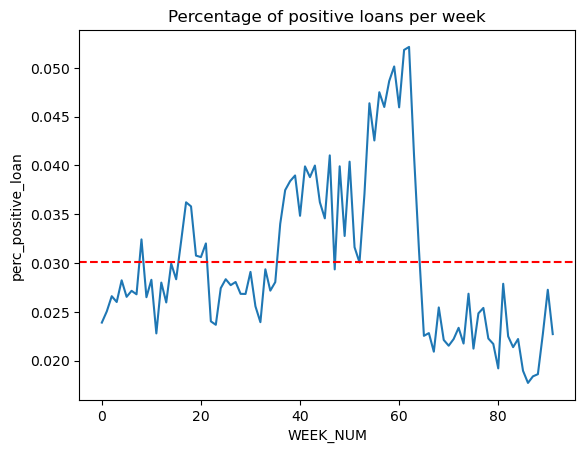

In [65]:
mean = df_train_agg['perc_positive_loan'].mean()

sns.lineplot(
    data=df_train_agg,
    x="WEEK_NUM",
    y="perc_positive_loan",
)
plt.axhline(mean, color='r', linestyle='--')

plt.title("Percentage of positive loans per week")
plt.show()

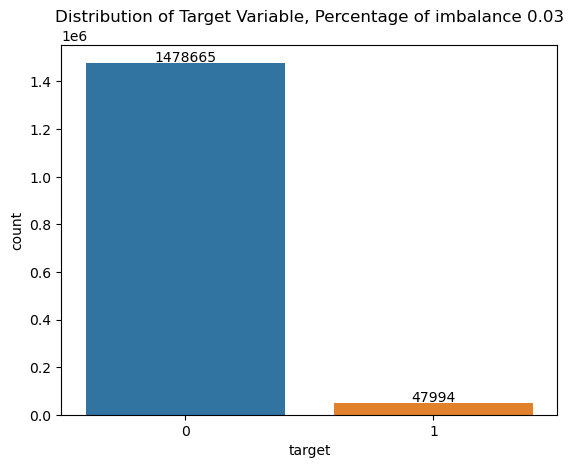

In [55]:
ax = sns.countplot(x='target', data=train_base.to_pandas())
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 4), 
                textcoords = 'offset points')

plt.title('Distribution of Target Variable, Percentage of imbalance {:.2f}'.format(train_base['target'].mean()))
plt.show()

# CONCLUSION

For each case id we only have one observation in the train and the test set. There is a severe imbalance that can change week by week. 